In [1]:
import pandas as pd
import sqlite3 as sq
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('Car_sales.csv')

In [3]:
data

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [4]:
data.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [5]:
data.shape

(157, 16)

In [6]:
data.dropna(inplace = True)
df1 = data.copy()

In [7]:
data

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Volkswagen,Golf,9.761,11.425,Passenger,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,1/24/2011,46.943877
146,Volkswagen,Jetta,83.721,13.240,Passenger,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,8/27/2011,47.638237
147,Volkswagen,Passat,51.102,16.725,Passenger,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,10/30/2012,61.701381
148,Volkswagen,Cabrio,9.569,16.575,Passenger,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,5/31/2011,48.907372


In [8]:
data.reset_index(drop = True, inplace = True)

In [9]:
data.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,59.112316,18.031538,25.969487,3.048718,181.282051,107.326496,71.189744,187.717949,3.324051,17.812821,24.119658,74.930921
std,75.058933,11.605632,14.149699,1.055169,58.591786,8.050588,3.530151,13.849926,0.597177,3.794609,4.404470,25.771796
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,16.767000,11.240000,16.980000,2.200000,140.000000,102.400000,68.500000,177.500000,2.911000,15.300000,22.000000,55.297117
50%,32.299000,14.010000,21.665000,3.000000,175.000000,107.000000,70.400000,187.800000,3.340000,17.200000,24.000000,70.660942
75%,76.029000,19.875000,29.465000,3.800000,210.000000,111.600000,73.600000,196.500000,3.823000,19.800000,26.000000,85.828408
max,540.561000,67.550000,82.600000,8.000000,450.000000,138.700000,79.300000,224.500000,5.115000,32.000000,45.000000,188.144323


In [10]:
data1 = pd.read_csv('Car_sales.csv')
data1.dropna(inplace = True)
data1.reset_index(drop = True, inplace = True)
data1

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
3,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
4,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Volkswagen,Golf,9.761,11.425,Passenger,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,1/24/2011,46.943877
113,Volkswagen,Jetta,83.721,13.240,Passenger,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,8/27/2011,47.638237
114,Volkswagen,Passat,51.102,16.725,Passenger,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,10/30/2012,61.701381
115,Volkswagen,Cabrio,9.569,16.575,Passenger,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,5/31/2011,48.907372


In [11]:
data.median()

Sales_in_thousands      32.299000
__year_resale_value     14.010000
Price_in_thousands      21.665000
Engine_size              3.000000
Horsepower             175.000000
Wheelbase              107.000000
Width                   70.400000
Length                 187.800000
Curb_weight              3.340000
Fuel_capacity           17.200000
Fuel_efficiency         24.000000
Power_perf_factor       70.660942
dtype: float64

In [12]:
data.agg(['median' , 'mean'])

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
median,32.299000,14.010000,21.665000,3.000000,175.000000,107.000000,70.400000,187.800000,3.340000,17.200000,24.000000,70.660942
mean,59.112316,18.031538,25.969487,3.048718,181.282051,107.326496,71.189744,187.717949,3.324051,17.812821,24.119658,74.930921


In [13]:
#As we can see the difference in mean and median is not much which implies there are very outliers in the data set

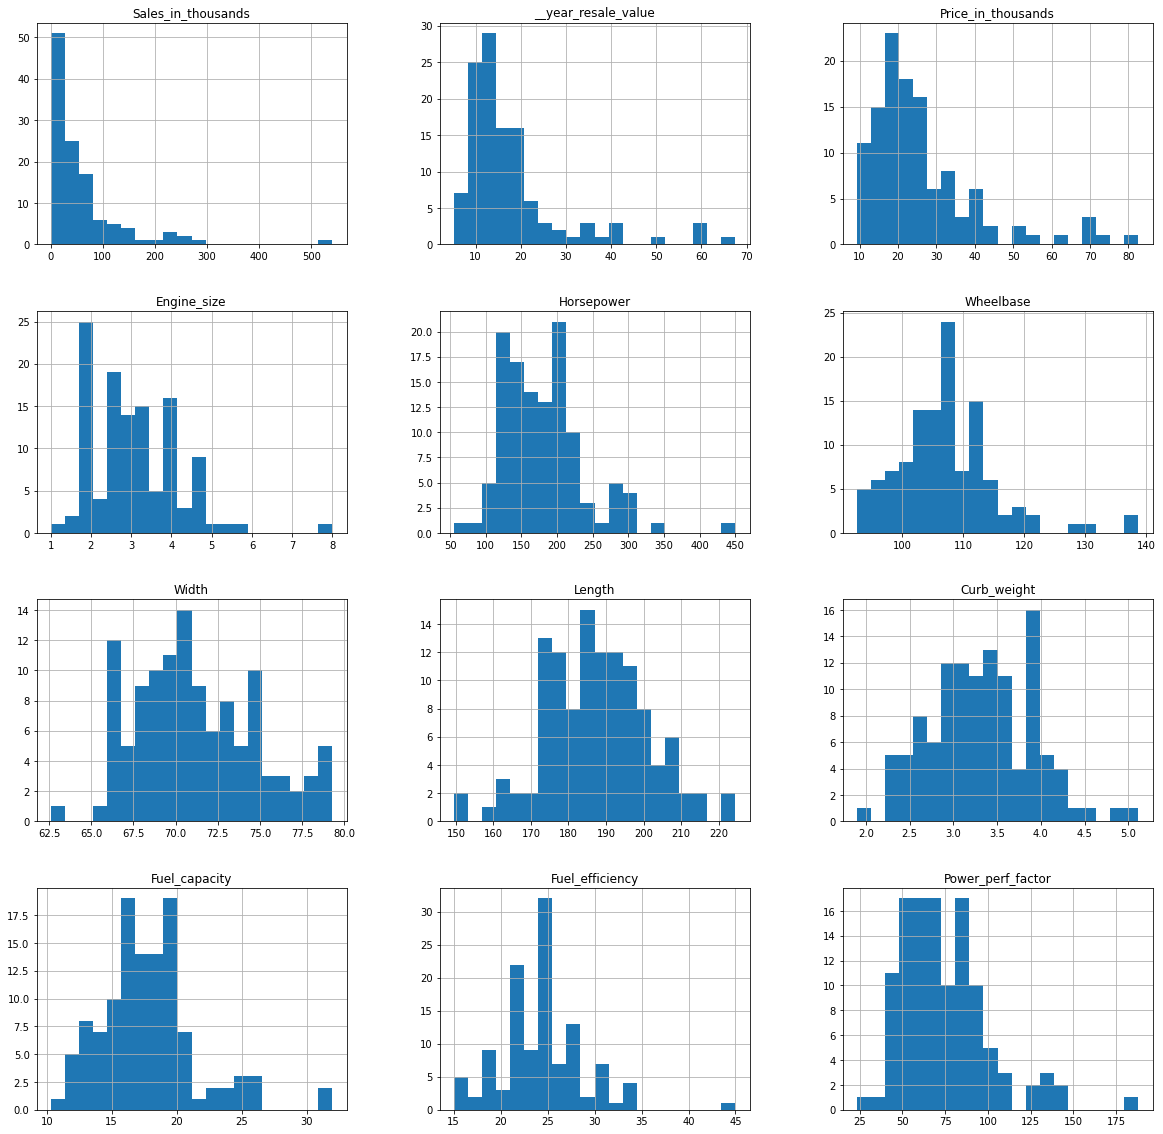

In [14]:
axlist = data.hist(bins = 20 , figsize = (20,20))

[Text(0.5, 0, 'Sales_in_thousands'), Text(0, 0.5, 'Horsepower')]

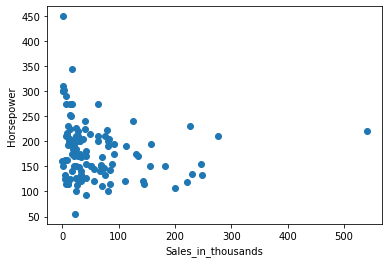

In [15]:
import matplotlib.pyplot as plt
ax = plt.axes()
ax.scatter(data.Sales_in_thousands , data.Horsepower)
ax.set(xlabel = 'Sales_in_thousands' , ylabel ='Horsepower')

In [16]:
col = data.select_dtypes('number').columns
skew_vals = data[col].skew()

In [17]:
skew_vals

Sales_in_thousands     3.169994
__year_resale_value    2.290997
Price_in_thousands     1.944910
Engine_size            1.122625
Horsepower             1.216837
Wheelbase              1.161745
Width                  0.429649
Length                 0.067233
Curb_weight            0.208504
Fuel_capacity          1.094260
Fuel_efficiency        0.911305
Power_perf_factor      1.276966
dtype: float64

In [18]:
skew_cols = skew_vals[abs(skew_vals)>0.75].sort_values(ascending=False)
skew_cols

Sales_in_thousands     3.169994
__year_resale_value    2.290997
Price_in_thousands     1.944910
Power_perf_factor      1.276966
Horsepower             1.216837
Wheelbase              1.161745
Engine_size            1.122625
Fuel_capacity          1.094260
Fuel_efficiency        0.911305
dtype: float64

<AxesSubplot:>

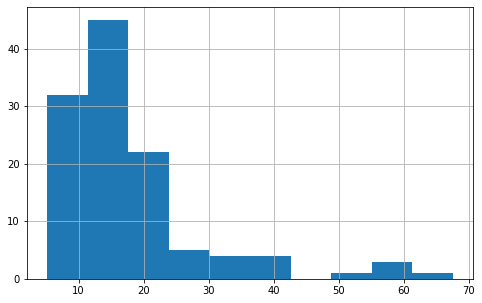

In [19]:
fig , ax_before = plt.subplots(figsize = (8,5))
data['__year_resale_value'].hist(ax=ax_before)

<AxesSubplot:>

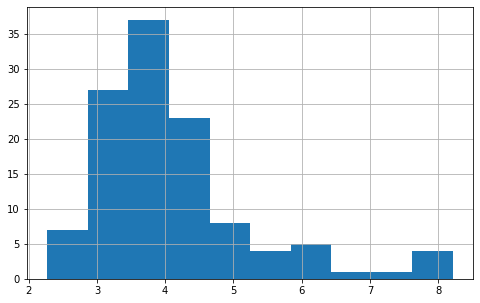

In [20]:
fig , ax_after = plt.subplots(figsize = (8,5))
data['__year_resale_value'].apply(np.sqrt).hist(ax=ax_after)

In [21]:
for col in skew_cols.index.values:
    if col == '__year_resale_value':
        continue
    data[col] = data[col].apply(np.sqrt)

In [22]:
skew_cols

Sales_in_thousands     3.169994
__year_resale_value    2.290997
Price_in_thousands     1.944910
Power_perf_factor      1.276966
Horsepower             1.216837
Wheelbase              1.161745
Engine_size            1.122625
Fuel_capacity          1.094260
Fuel_efficiency        0.911305
dtype: float64

In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales_in_thousands,117.0,6.614531,3.936078,0.331662,4.094753,5.683221,8.719461,23.249968
__year_resale_value,117.0,18.031538,11.605632,5.160000,11.240000,14.010000,19.875000,67.550000
Price_in_thousands,117.0,4.948234,1.223628,3.038914,4.120680,4.654568,5.428167,9.088454
Engine_size,117.0,1.721655,0.292150,1.000000,1.483240,1.732051,1.949359,2.828427
Horsepower,117.0,13.301377,2.095938,7.416198,11.832160,13.228757,14.491377,21.213203
Wheelbase,117.0,10.352869,0.381891,9.622889,10.119289,10.344080,10.564090,11.777096
Width,117.0,71.189744,3.530151,62.600000,68.500000,70.400000,73.600000,79.300000
Length,117.0,187.717949,13.849926,149.400000,177.500000,187.800000,196.500000,224.500000
Curb_weight,117.0,3.324051,0.597177,1.895000,2.911000,3.340000,3.823000,5.115000
Fuel_capacity,117.0,4.198194,0.435438,3.209361,3.911521,4.147288,4.449719,5.656854


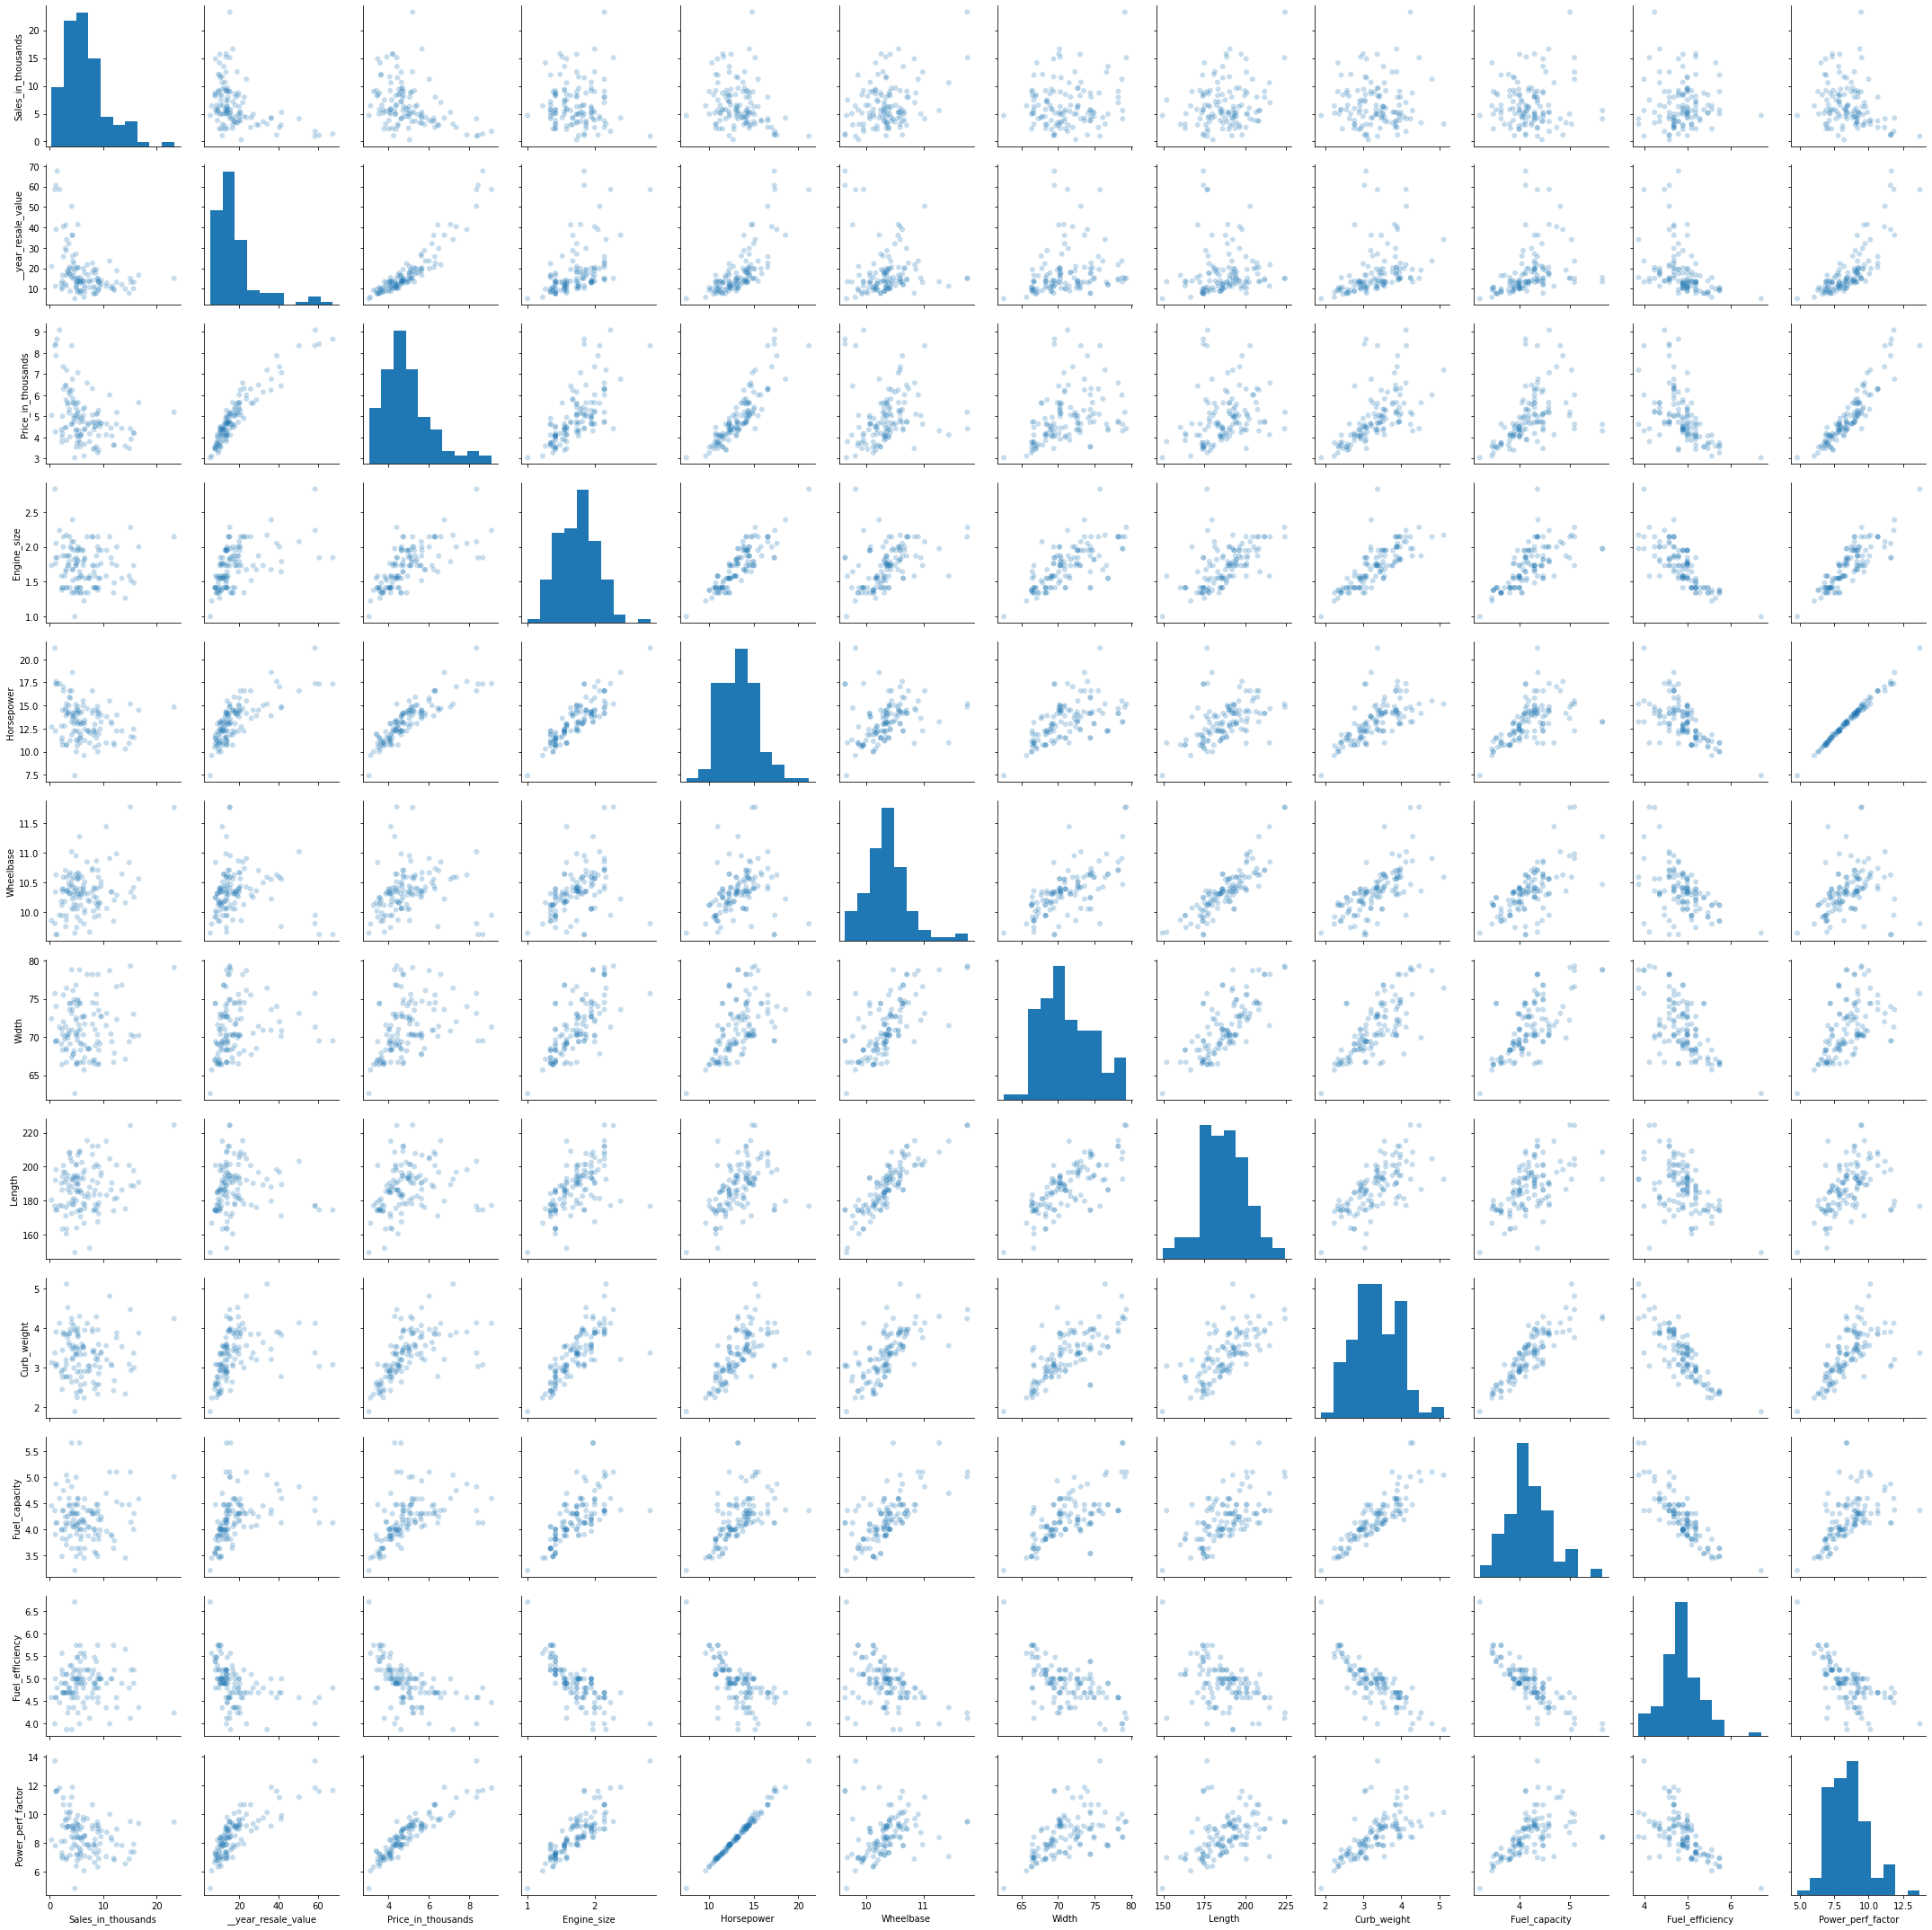

In [24]:
sns.pairplot(data,plot_kws = dict(alpha = .25 , edgecolor = 'None'))

In [25]:
X = data.loc[:]
Y = data['__year_resale_value']

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         117 non-null    object 
 1   Model                117 non-null    object 
 2   Sales_in_thousands   117 non-null    float64
 3   __year_resale_value  117 non-null    float64
 4   Vehicle_type         117 non-null    object 
 5   Price_in_thousands   117 non-null    float64
 6   Engine_size          117 non-null    float64
 7   Horsepower           117 non-null    float64
 8   Wheelbase            117 non-null    float64
 9   Width                117 non-null    float64
 10  Length               117 non-null    float64
 11  Curb_weight          117 non-null    float64
 12  Fuel_capacity        117 non-null    float64
 13  Fuel_efficiency      117 non-null    float64
 14  Latest_Launch        117 non-null    object 
 15  Power_perf_factor    117 non-null    flo

In [27]:
X2 = X.copy()
X['PIT'] = X['Price_in_thousands'] ** 2
X['PPF'] = X['Power_perf_factor'] ** 2

In [28]:
data['Manufacturer'].value_counts()

Ford          10
Dodge          9
Chevrolet      8
Toyota         8
Mitsubishi     7
Mercury        6
Nissan         5
Chrysler       5
Honda          5
Volkswagen     5
Pontiac        5
Mercedes-B     4
Oldsmobile     4
Buick          4
Porsche        3
Jeep           3
Lexus          3
Cadillac       3
Hyundai        3
Audi           3
Plymouth       3
Saturn         3
Acura          3
BMW            2
Lincoln        2
Infiniti       1
Name: Manufacturer, dtype: int64

In [29]:
pd.get_dummies(data['Manufacturer'])

,Acura,Audi,BMW,Buick,Cadillac,Chevrolet,Chrysler,Dodge,Ford,Honda,...,Mercury,Mitsubishi,Nissan,Oldsmobile,Plymouth,Pontiac,Porsche,Saturn,Toyota,Volkswagen
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
data

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,4.113271,16.360,Passenger,4.636809,1.341641,11.832160,10.059821,67.3,172.4,2.639,3.633180,5.291503,2/2/2012,7.634144
1,Acura,TL,6.275667,19.875,Passenger,5.329165,1.788854,15.000000,10.397115,70.3,192.9,3.517,4.147288,5.000000,6/3/2011,9.558806
2,Acura,RL,2.930529,29.725,Passenger,6.480741,1.870829,14.491377,10.705139,71.4,196.6,3.850,4.242641,4.690416,3/10/2011,9.559800
3,Audi,A4,4.516304,22.255,Passenger,4.897959,1.341641,12.247449,10.129166,68.2,178.0,2.998,4.049691,5.196152,10/8/2011,7.923234
4,Audi,A6,4.333590,23.555,Passenger,5.826663,1.673320,14.142136,10.425929,76.1,192.0,3.561,4.301163,4.690416,8/9/2011,9.195929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Volkswagen,Golf,3.124260,11.425,Passenger,3.860052,1.414214,10.723805,9.944848,68.3,163.3,2.767,3.807887,5.099020,1/24/2011,6.851560
113,Volkswagen,Jetta,9.149918,13.240,Passenger,4.086563,1.414214,10.723805,9.944848,68.3,172.3,2.853,3.807887,5.099020,8/27/2011,6.902046
114,Volkswagen,Passat,7.148566,16.725,Passenger,4.604346,1.341641,12.247449,10.315038,68.5,184.1,3.043,4.049691,5.196152,10/30/2012,7.855023
115,Volkswagen,Cabrio,3.093380,16.575,Passenger,4.471018,1.414214,10.723805,9.869144,66.7,160.4,3.079,3.701351,5.099020,5/31/2011,6.993381


In [31]:
# Hypothesis test - 1

In [32]:
import math
from numpy.random import randn
from statsmodels.stats.weightstats import ztest

In [33]:
data['RH'] = data['__year_resale_value']*data['Horsepower']
data['RH']

0      193.574131
1      298.125000
2      430.756174
3      272.566971
4      333.118005
          ...    
112    122.519475
113    141.983182
114    204.838580
115    177.747073
116    147.559561
Name: RH, Length: 117, dtype: float64

In [34]:
dodge = data.loc[data['Manufacturer'] == 'Dodge']
dodge

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,RH
28,Dodge,Neon,8.719748,7.750,Passenger,3.555278,1.414214,11.489125,10.246951,74.4,174.4,2.567,3.535534,5.385165,12/12/2011,7.216987,89.040721
29,Dodge,Avenger,2.175776,12.545,Passenger,4.364058,1.581139,12.767145,10.183320,69.1,190.2,2.879,3.987480,4.898979,7/1/2012,8.102500,160.163838
30,Dodge,Stratus,8.437180,10.185,Passenger,4.497777,1.581139,12.961481,10.392305,71.0,186.0,3.058,4.000000,4.898979,10/31/2011,8.238696,132.012688
31,Dodge,Viper,0.957079,58.470,Passenger,8.350150,2.828427,21.213203,9.808160,75.7,176.7,3.375,4.358899,4.000000,8/7/2011,13.716571,1240.336005
32,Dodge,Ram Pickup,15.068543,15.060,Car,4.411349,2.280351,15.165751,11.777096,79.3,224.2,4.470,5.099020,4.123106,3/6/2012,9.497984,228.396208
33,Dodge,Ram Wagon,4.094753,15.510,Car,4.616817,1.974842,13.228757,10.469002,78.8,192.6,4.245,5.656854,3.872983,1/6/2012,8.434174,205.178014
34,Dodge,Ram Van,5.571176,13.425,Car,4.309872,1.974842,13.228757,11.278298,78.8,208.5,4.298,5.656854,4.000000,7/26/2012,8.371280,177.596057
35,Dodge,Dakota,10.550498,11.260,Car,4.120680,1.581139,10.954451,11.445523,71.5,215.0,3.557,4.690416,4.358899,11/25/2011,7.045921,123.347120
36,Dodge,Caravan,13.481432,12.025,Car,4.423234,1.549193,12.247449,10.644247,76.8,186.3,3.533,4.472136,4.898979,9/1/2011,7.824768,147.275571


In [35]:
n = dodge['RH'].count()
dmean , dstd = dodge['RH'].agg([np.mean,np.std])
print(dmean , dstd , sep = '\n')

278.14958024338307
363.2913035006943


In [36]:
df = data.loc[data['Manufacturer'] != 'Dodge']
mean = np.mean(data['RH'])
mean

257.89172975465226

In [37]:
alpha = 0.05
zscore , pvalue = ztest(dodge['RH'], value = mean)
pvalue

0.8671450139522453

In [38]:
zscore

0.16728600679558045

In [39]:
if pvalue < alpha:
    print("Null Hypothesis is rejected")
else :
    print("We don't reject the null hypothesis")

We don't reject the null hypothesis


In [40]:
#Hypothesis test - 2 if year_resale_value >= 46, then Power_perf_factor >=5

In [41]:
small_df = data.loc[data1['__year_resale_value'] >= 20]

In [42]:
small_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales_in_thousands,27.0,3.843067,2.329307,0.331662,2.540718,3.714566,4.711313,11.195446
__year_resale_value,27.0,34.410000,13.980281,20.190000,23.040000,29.725000,40.812500,67.550000
Price_in_thousands,27.0,6.650923,1.157317,4.897959,5.802968,6.316249,7.270514,9.088454
Engine_size,27.0,1.943745,0.303196,1.341641,1.732051,1.949359,2.144761,2.828427
Horsepower,27.0,15.590713,1.952322,12.247449,14.404599,15.000000,16.806255,21.213203
Wheelbase,27.0,10.370852,0.388607,9.622889,10.175845,10.440307,10.611298,11.022704
Width,27.0,72.518519,2.998081,67.700000,70.350000,72.000000,74.600000,78.700000
Length,27.0,190.155556,12.575352,171.000000,177.700000,190.100000,199.400000,215.300000
Curb_weight,27.0,3.674074,0.537854,2.778000,3.230000,3.778000,3.896000,5.115000
Fuel_capacity,27.0,4.423955,0.289080,4.049691,4.271902,4.358899,4.588025,5.099020


In [43]:
mean = np.sqrt(105)
n = 27
pmean, pstd = small_df['Power_perf_factor'].agg([np.mean, np.std])
pmean

10.207361333148222

In [44]:
alpha = 0.05
z_score2, pvalue2 = ztest(small_df['Power_perf_factor'], value=mean)
z_score2

-0.15716525578138277

In [45]:
pvalue2

0.8751146098296974

In [46]:
z = (pmean - mean)/(pstd/math.sqrt(n))
z

-0.15716525578138277

In [47]:
if pvalue2 < alpha:
    print("Null Hypothesis Rejected")
else:
    print("We do not reject the null hypothesis")

We do not reject the null hypothesis


In [48]:
# Hypothesis testing - 3 

In [49]:
df['Vehicle_type'].value_counts()

Passenger    84
Car          24
Name: Vehicle_type, dtype: int64

In [50]:
sdf = data.loc[data['Vehicle_type'] == 'Car']
sdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales_in_thousands,29.0,8.554343,4.798259,3.136080,4.935686,7.453657,11.195446,23.249968
__year_resale_value,29.0,16.186034,4.901001,7.850000,13.425000,15.240000,18.810000,34.080000
Price_in_thousands,29.0,4.848507,0.780899,3.395291,4.411349,4.744470,5.189894,7.192218
Engine_size,29.0,1.824553,0.235978,1.414214,1.581139,1.816590,2.000000,2.280351
Horsepower,29.0,13.225023,1.334493,10.908712,12.247449,13.228757,14.317821,15.491933
Wheelbase,29.0,10.604351,0.510058,9.664368,10.310189,10.564090,10.867382,11.777096
Width,29.0,72.541379,4.425617,66.500000,69.400000,71.700000,76.600000,79.300000
Length,29.0,190.355172,16.438774,152.000000,181.200000,190.100000,200.900000,224.500000
Curb_weight,29.0,3.810103,0.590279,2.580000,3.510000,3.876000,4.241000,5.115000
Fuel_capacity,29.0,4.635259,0.443878,3.885872,4.472136,4.527693,5.000000,5.656854


In [51]:
mean = np.sqrt(75)
lmean, lstd = sdf['Fuel_capacity'].agg([np.mean, np.std])
n=29
lmean

4.635259274109829

In [55]:
alpha = 0.05
z_score3, pvalue3 = ztest(data['Fuel_capacity'], value=mean)
z_score3

-110.84147909192983

In [56]:
z = (lmean - mean)/(lstd/math.sqrt(n))

In [57]:
if pvalue2 < alpha:
    print("Null Hypothesis Rejected")
else:
    print("We do not reject the null hypothesis")

We do not reject the null hypothesis
